<a href="https://colab.research.google.com/github/VitikaJain25/Data_Science/blob/master/LinearRegressionWithNumericData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.

data = pd.read_csv(io.BytesIO(uploaded['boston_data.csv']))

Saving boston_data.csv to boston_data.csv


In [3]:
data.head()

,ID,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,4,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
3,5,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
4,7,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9


In [4]:
data.shape

(333, 12)

In [5]:
data.info()
# All are numeric features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   indus    333 non-null    float64
 2   chas     333 non-null    int64  
 3   nox      333 non-null    float64
 4   rm       333 non-null    float64
 5   age      333 non-null    float64
 6   dis      333 non-null    float64
 7   rad      333 non-null    int64  
 8   tax      333 non-null    int64  
 9   ptratio  333 non-null    float64
 10  lstat    333 non-null    float64
 11  medv     333 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 31.3 KB


In [6]:
data.describe()

,ID,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,12.515435,22.768769
std,147.859438,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,7.067781,9.173468
min,1.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,1.730000,5.000000
25%,123.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,7.180000,17.400000
50%,244.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,10.970000,21.600000
75%,377.000000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,16.420000,25.000000
max,506.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,37.970000,50.000000


Text(10.049999999999997, 0.5, 'Median Value of Owner occupied homes on $1000s.')

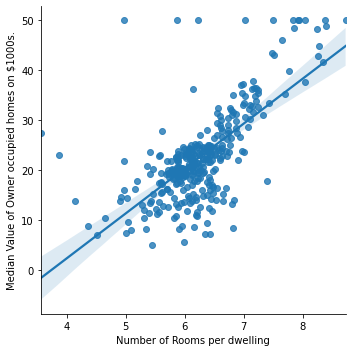

In [8]:
# lm plot to see the relationship between 'rm', 'medv'
sns.lmplot('rm', 'medv', data)
plt.xlabel("Number of Rooms per dwelling")
plt.ylabel("Median Value of Owner occupied homes on $1000s.")

Text(10.049999999999997, 0.5, 'Median Value of Owner occupied homes on $1000s.')

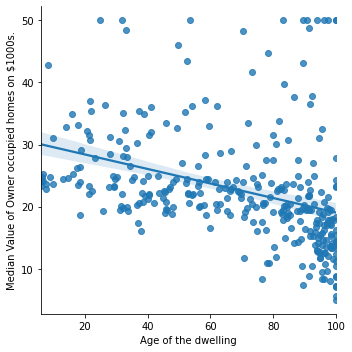

In [9]:
sns.lmplot('age', 'medv', data)
plt.xlabel("Age of the dwelling")
plt.ylabel("Median Value of Owner occupied homes on $1000s.")

# Neagtive relationship
# Older homes tend to have lower value

Text(10.049999999999997, 0.5, 'Median Value of Owner occupied homes on $1000s.')

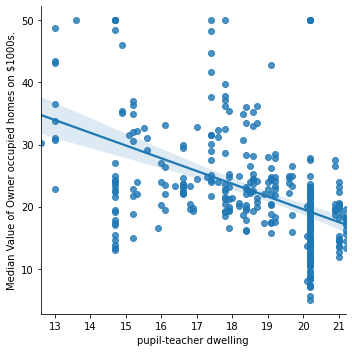

In [10]:
sns.lmplot('ptratio', 'medv', data)
plt.xlabel("pupil-teacher dwelling")
plt.ylabel("Median Value of Owner occupied homes on $1000s.")

# Neagtive relationship
# If pt is high, prices tend to be low

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
X = data.drop('medv', axis = 1)
Y = data['medv']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [15]:
x_train.shape, y_train.shape

((266, 11), (266,))

In [16]:
x_test.shape, y_test.shape

((67, 11), (67,))

In [0]:
linear_regression = LinearRegression()

In [18]:
linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred = linear_regression.predict(x_test)
y_pred

array([25.72012589, 29.1570861 , 15.87752682, 13.26991263, 22.85070692,
       26.56624031, 26.75912172, 18.91817361, 25.67424846, 19.50488412,
       16.67555269, 25.8489368 , 30.83101543, 37.24371838, 15.83586278,
       33.54058199, 22.03888445, 25.92264011, 24.93233696, 24.51510402,
       19.84540559, 19.79425713, 19.16907167,  5.12110727, 15.80116987,
       21.99744642, 27.32610247, 38.15946555, 24.56522844, 25.32621341,
       13.89741796, 34.63633465, 36.05117155, 20.24699992, 24.52275493,
       11.4360184 , 24.68564234,  7.31547135, 20.53397172, 27.74346583,
       20.52802225, 25.47816308, 26.62481351, 21.07438931, 21.87730439,
       29.58720344, 26.67485129, 30.04691632, 21.19707433, 17.25486176,
       38.27328304, 24.23285454, 22.13359278, 17.74846423, 26.98572138,
       21.89631836, 16.04603651, 18.73974849, 30.70021618, 28.05806279,
       31.56993958, 42.65796716, 23.3764715 , 17.61289178, 15.84112353,
       25.41268219, 26.15530701])

In [20]:
# Lets create a DataFrame having actual and predicted values.
df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
df_y.sample(10)

,y_test,y_pred
175,43.1,34.636335
6,18.9,21.877304
168,24.3,20.533972
102,21.5,19.794257
311,13.8,16.675553
101,15.4,13.269913
78,19.2,24.515104
210,16.2,20.247000
21,24.7,24.232855
297,14.9,17.748464


In [23]:
# We will calculate R2 score to find out how good your model is.
# R2 Value for Training Data
print("Training Score: ", linear_regression.score(x_train, y_train))

Training Score:  0.7191154693675491


In [24]:
# R2 Value for Test Data
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

print("Test Score: ", score)

Test Score:  0.6917086895657422
